In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Lire le graphe depuis le fichier

In [2]:
def lire_graphe(fichier):
    """
    Lit un graphe à partir d'un fichier et le retourne sous forme de liste d'adjacence.
    :param fichier: Chemin vers le fichier contenant le graphe.
    :return: Dictionnaire représentant la liste d'adjacence du graphe.
    """
    graphe = {}
    with open(fichier, 'r') as f:
        for ligne in f:
            # Suppression des espaces inutiles et saut de ligne
            ligne = ligne.strip()

            #u, v = map(int, ligne.split(","))   # Split par ","
            u, v = map(int, ligne.split())  # Split par espace
            
            # Ajouter l'arête dans les deux sens pour un graphe non orienté
            graphe.setdefault(u, []).append(v)
            graphe.setdefault(v, []).append(u)
    return graphe


# Afficher le graphe

In [3]:
def afficher_graphe(graphe, couleurs=None, titre=None):
    """
    Affiche le graphe donné sous forme de dictionnaire avec des couleurs personnalisées.

    :param graphe: Dictionnaire représentant le graphe (liste d'adjacence).
    :param couleurs: Dictionnaire des couleurs pour chaque nœud.
    :param title: Titre à afficher pour le graphe.
    """
    # Créer un objet graphe NetworkX
    G = nx.Graph()
    for sommet, voisins in graphe.items():
        for voisin in voisins:
            G.add_edge(sommet, voisin)

    # Layout for better node positioning
    pos = nx.spring_layout(G, seed=69)  # Spring layout for a more aesthetic layout

    # Si aucune couleur n'est fournie, utiliser une couleur par défaut
    if couleurs is None:
        couleurs = {node: "lightblue" for node in G.nodes()}

    # Draw the graph with improved parameters
    plt.figure(figsize=(10, 6))  # Larger figure for better visualization
    nx.draw(
        G, 
        pos, 
        with_labels=True, 
        node_size=500,                      # Larger nodes for better visibility
        node_color=[couleurs[node] for node in G.nodes()],  # Apply custom colors
        font_size=10,                       # Adjust font size
        font_color="black",                 # Label color
        font_weight="bold",                 # Bold font for labels
        edge_color="gray",                  # Edge color
        linewidths=1.5                      # Edge line width
    )

    # Ajouter un titre si fourni
    if titre:
        plt.title(titre, fontsize=12, fontweight="bold")
        
    plt.show()


# Afficher les étapes de brulage du graphe

In [4]:
def visualiser_graphe_par_etape(graphe, chemin):
    """
    Affiche le graphe à chaque étape avec les sommets brûlés et non brûlés.

    :param graphe: Dictionnaire représentant le graphe (liste d'adjacence).
    :param chemin: Liste des sommets choisis comme sources de feu.
    """
    # Initialisation : tous les sommets sont non brûlés
    couleurs = {sommet: "lightgrey" for sommet in graphe.keys()}
    etape = 1

    # Afficher le graphe à chaque étape
    while not all(sommet == "red" for sommet in couleurs.values()) :
        # Mettre à jour la couleur du sommet source en rouge
        source = chemin[etape-1] if etape <= len(chemin) else None
        
        if source :
            couleurs[source] = "red"
            titre = f"Étape {etape}: Source {source}"
        else :
            titre = f"Étape {etape}: Aucune source"
        
        # Colorier les prochains voisins à bruler en jaune
        for sommet in couleurs:
            if couleurs[sommet] == "yellow":
                couleurs[sommet] = "red"
        
        # Trouver les voisins à l'étape actuelle
        for sommet in couleurs:
            if couleurs[sommet] == "red":
                voisins = graphe[sommet]
                for voisin in voisins:
                    if couleurs[voisin] == "lightgrey":  # Ne colorer que les sommets non brûlés
                        couleurs[voisin] = "yellow"
        
        etape += 1

        # Afficher l'état actuel du graphe
        afficher_graphe(graphe, couleurs=couleurs, titre=titre)

In [5]:
def generate_cyclic_graph(n):
    """
    Génère un graphe cyclique avec n nœuds.
    :param n: Nombre de nœuds
    :return: Un objet NetworkX représentant le graphe cyclique
    """
    G = nx.cycle_graph(n)
    return G

In [6]:
def generate_chain_graph(n):
    """
    Génère un graphe chaîné avec n nœuds.
    :param n: Nombre de nœuds
    :return: Un objet NetworkX représentant le graphe chaîné
    """
    G = nx.path_graph(n)
    return G

In [10]:
def generate_spider_graph(central_node, leg_length, num_legs):
    """
    Génère un graphe en forme d'araignée avec un nœud central, des "pattes" de longueur donnée, et un nombre donné de pattes.
    :param central_node: Le numéro ou le nom du nœud central
    :param leg_length: Longueur de chaque patte
    :param num_legs: Nombre de pattes (branches)
    :return: Un objet NetworkX représentant le graphe araignée
    """
    G = nx.Graph()
    G.add_node(central_node)
    for i in range(num_legs):
        previous_node = central_node
        for j in range(leg_length):
            # Branche i et noeud j
            new_node = f"{i}_{j}"
            G.add_edge(previous_node, new_node)
            previous_node = new_node
    return G

In [8]:
# Exemple d'utilisation
def plot_graph(G, title="Graph"):
    """Affiche le graphe en utilisant Matplotlib."""
    plt.figure(figsize=(8, 6))
    nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black', edge_color='gray')
    plt.title(title)
    plt.show()

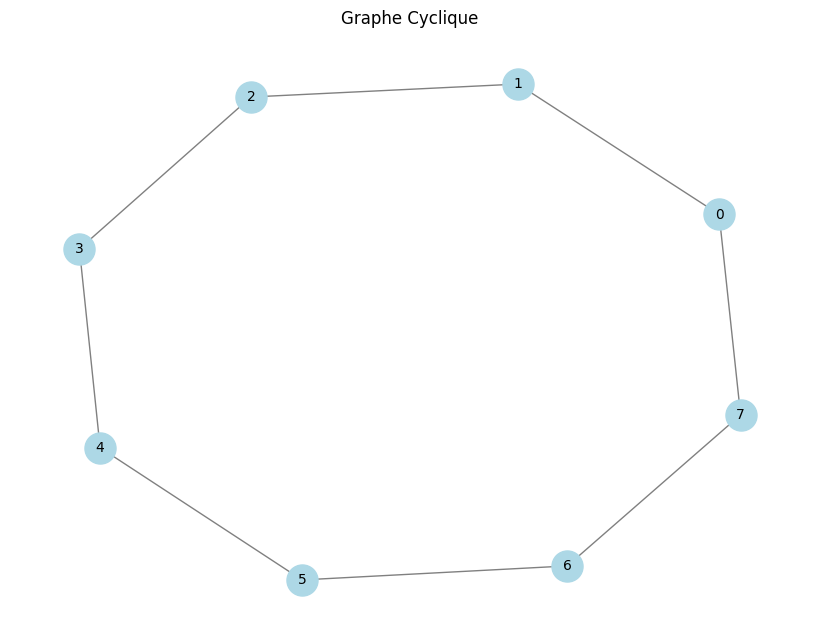

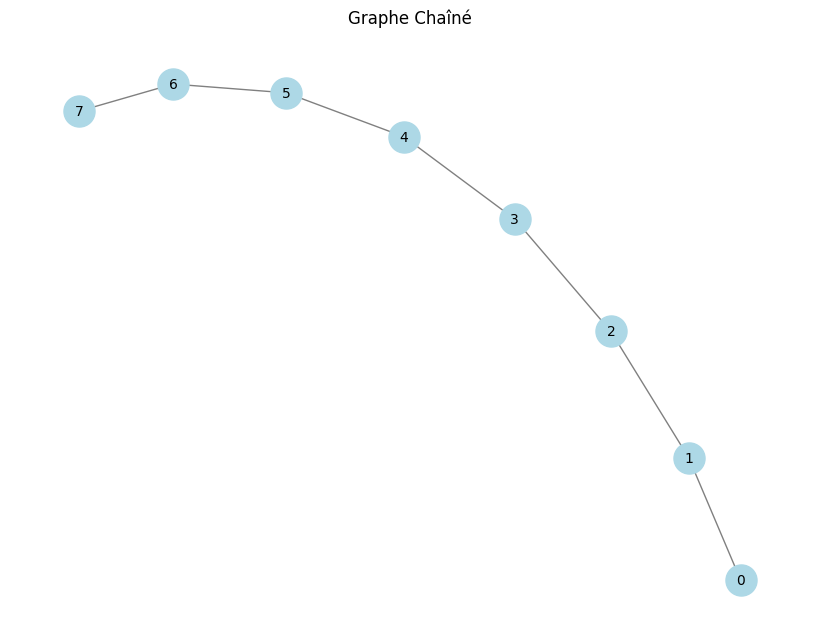

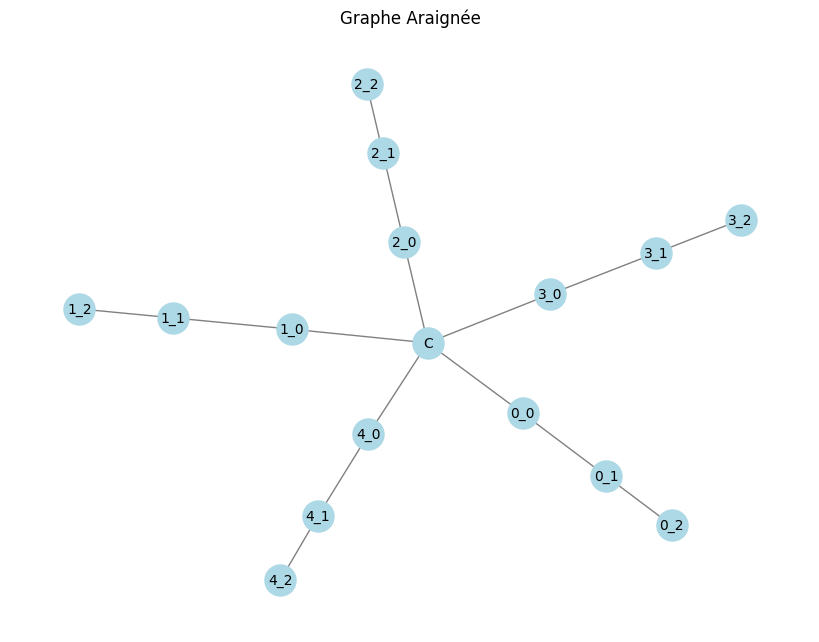

In [11]:
# Génération et affichage des graphes
if __name__ == "__main__":
    n = 8  # Nombre de nœuds

    # Graphe cyclique
    cyclic_graph = generate_cyclic_graph(n)
    plot_graph(cyclic_graph, title="Graphe Cyclique")

    # Graphe chaîné
    chain_graph = generate_chain_graph(n)
    plot_graph(chain_graph, title="Graphe Chaîné")

    # Graphe araignée
    spider_graph = generate_spider_graph(central_node="C", leg_length=3, num_legs=5)
    plot_graph(spider_graph, title="Graphe Araignée")